In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
type(time_idx[0])

str

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw[pd_raw['Country/Region']=='India'].iloc[:,10::].sum(axis=0)[-4:]

9/10/20    4562414
9/11/20    4659984
9/12/20    4754356
9/13/20    4846427
dtype: int64

In [8]:
country_list=['India',
              'US',
              'Spain',
              'Germany',
              'United Kingdom',
              'Korea, South',
              'Japan'
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [10]:
df_plot.head()

,date,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan
0,1/22/20,0,1,0,0,0,1,2
1,1/23/20,0,1,0,0,0,1,2
2,1/24/20,0,2,0,0,0,2,2
3,1/25/20,0,2,0,0,0,2,2
4,1/26/20,0,5,0,0,0,3,4


<AxesSubplot:xlabel='date'>

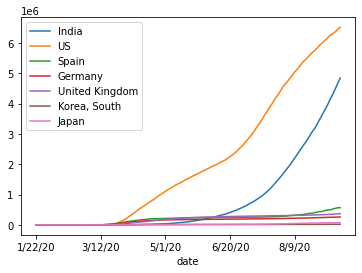

In [11]:
df_plot.set_index('date').plot()

In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
print(type(time_str[0]))


<class 'str'>


In [13]:
df_plot['date']=time_idx

type(df_plot['date'][0])
df_plot.date[1:3]

1   2020-01-23
2   2020-01-24
Name: date, dtype: datetime64[ns]

In [14]:
df_plot.head()

,date,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan
0,2020-01-22,0,1,0,0,0,1,2
1,2020-01-23,0,1,0,0,0,1,2
2,2020-01-24,0,2,0,0,0,2,2
3,2020-01-25,0,2,0,0,0,2,2
4,2020-01-26,0,5,0,0,0,3,4


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

### Relational data model - defining a primary key


In [16]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,no,Albania,0,0,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,no,Algeria,0,0,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,no,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country'])
pd_relational_model.head()



1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state country                                                             
no    Afghanistan        0        0        0        0        0        0   
      Albania            0        0        0        0        0        0   
      Algeria            0        0        0        0        0        0   
      Andorra            0        0        0        0        0        0   
      Angola             0        0        0        0        0        0   

                   1/28/20  1/29/20  1/30/20  1/31/20  ...  9/4/20  9/5/20  \
state country                                          ...                   
no    Afghanistan        0        0        0        0  ...   38304   38324   
      Albania            0        0        0        0  ...    9967   10102   
      Algeria            0        0        0        0  ...   45773   46071   
      Andorra            0        0        0        0  ...    1215    1215   
      Angola             0        0        0        0  ...    2876    2935   

                   9/6/20  9/7/20  9/8/20  9/9/20  9/10/20  9/11/20  9/12/20  \
state country                                                                  
no    Afghanistan   38398   38494   38520   38544    38572    38606    38641   
      Albania       10255   10406   10553   10704    10860    11021    11185   
      Algeria       46364   46653   46938   47216    47488    47752    48007   
      Andorra        1215    1261    1261    1301     1301     1344     1344   
      Angola         2965    2981    3033    3092     3217     3279     3335   

                   9/13/20  
state country               
no    Afghanistan    38716  
      Albania        11353  
      Algeria        48254  
      Andorra         1344  
      Angola          3388  

[5 rows x 236 columns]

In [20]:
pd_relational_model=pd_relational_model.T
pd_relational_model.head()

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state               no                                       \
country United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
1/22/20              0       0          0         0       0   
1/23/20              0       0          0         0       2   
1/24/20              0       0          0         0       2   
1/25/20              0       0          0         0       2   
1/26/20              0       0          0         0       2   

state                                                            
country West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
1/22/20                  0              0     0      0        0  
1/23/20                  0              0     0      0        0  
1/24/20                  0              0     0      0        0  
1/25/20                  0              0     0      0        0  
1/26/20                  0              0     0      0        0  

[5 rows x 266 columns]

In [21]:
pd_relational_model=pd_relational_model.stack(level=[0,1]).reset_index()


In [22]:
pd_relational_model = pd_relational_model.rename(columns={'level_0':'date',0:'confirmed'})
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [23]:
type(pd_relational_model['date'][0])

str

In [24]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed             int32
dtype: object

In [25]:
pd_relational_model.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,Anguilla,United Kingdom,0
2,2020-01-22,Anhui,China,1
3,2020-01-22,Aruba,Netherlands,0
4,2020-01-22,Australian Capital Territory,Australia,0


In [26]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [27]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


In [28]:
test_data=pd_JH_data[((pd_JH_data['country']=='India')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [29]:
test_data.tail()

,date,state,country,confirmed
62032,2020-09-11,no,India,4659984
62287,2020-09-12,no,Germany,260817
62299,2020-09-12,no,India,4754356
62552,2020-09-13,no,Germany,261737
62565,2020-09-13,no,India,4846427


In [30]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-09-13,no,261737
India,2020-09-13,no,4846427


In [31]:
test_data.groupby(['state', 'country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-13     261737
      India   2020-09-13    4846427

In [32]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    
    X = np.arange(-1,2).reshape(-1, 1)
    

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    

    return intercept/slope


if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))

the test slope is: [2.]


In [33]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [34]:
test_data[['state','country', 'confirmed']].tail()

,state,country,confirmed
62032,no,India,4659984
62287,no,Germany,260817
62299,no,India,4754356
62552,no,Germany,261737
62565,no,India,4846427


In [36]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

In [37]:
pd_DR_result = pd_DR_result.reset_index()

In [38]:
pd_DR_result

,state,country,level_2,confirmed
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN
...,...,...,...,...
62771,no,Zimbabwe,61540,112.544529
62772,no,Zimbabwe,61776,228.410256
62773,no,Zimbabwe,62072,298.146667
62774,no,Zimbabwe,62308,272.000000


In [39]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.tail()

,state,country,index,confirmed_DR
62771,no,Zimbabwe,61540,112.544529
62772,no,Zimbabwe,61776,228.410256
62773,no,Zimbabwe,62072,298.146667
62774,no,Zimbabwe,62308,272.000000
62775,no,Zimbabwe,62775,319.333333


In [40]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [41]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR
62771,62771,2020-09-13,no,Barbados,181,360.666667
62772,62772,2020-09-13,no,Belarus,74173,380.346187
62773,62773,2020-09-13,no,Belgium,93455,96.444213
62774,62774,2020-09-13,no,Albania,11353,67.387550
62775,62775,2020-09-13,no,Zimbabwe,7526,319.333333


In [42]:
pd_result_larg[pd_result_larg['country']=='Germany'].head()

,index,date,state,country,confirmed,confirmed_DR
43,43,2020-01-22,no,Germany,0,NaN
308,308,2020-01-23,no,Germany,0,NaN
575,575,2020-01-24,no,Germany,0,NaN
841,841,2020-01-25,no,Germany,0,NaN
1107,1107,2020-01-26,no,Germany,0,NaN


## Filtering the data with groupby apply 

In [43]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [44]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [45]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8
2,2,2020-01-22,no,Kosovo,0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0


In [46]:
pd_result_larg[pd_result_larg['country']=='Germany'].head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
43,43,2020-01-22,no,Germany,0,NaN,0.0
308,308,2020-01-23,no,Germany,0,NaN,0.0
575,575,2020-01-24,no,Germany,0,NaN,0.0
841,841,2020-01-25,no,Germany,0,NaN,0.2
1107,1107,2020-01-26,no,Germany,0,NaN,1.0


233

In [47]:
import plotly.graph_objects as go
def quick_plot(x_in, df_input,y_scale='log',slider=False):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()
      
    

## Filtered doubling rate

In [48]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})



In [49]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
62771,62771,2020-09-13,no,Barbados,181,360.666667,180.6,902.000000
62772,62772,2020-09-13,no,Belarus,74173,380.346187,74170.2,384.099688
62773,62773,2020-09-13,no,Belgium,93455,96.444213,93433.4,97.997033
62774,62774,2020-09-13,no,Albania,11353,67.387550,11349.2,68.927295
62775,62775,2020-09-13,no,Zimbabwe,7526,319.333333,7528.8,301.361446


In [50]:
pd_result_larg.date

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
62771   2020-09-13
62772   2020-09-13
62773   2020-09-13
62774   2020-09-13
62775   2020-09-13
Name: date, Length: 62776, dtype: datetime64[ns]

In [51]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN) 

In [52]:
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8,NaN
2,2,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN


In [53]:
quick_plot(pd_result_larg[pd_result_larg['country']=='Germany'].date,
           pd_result_larg[pd_result_larg['country']=='Germany'].iloc[:,[4,5,6,7]],
           y_scale='log',
           slider=True)

In [54]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)

In [55]:
pd_result_larg

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8,NaN
2,2,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
62771,62771,2020-09-13,no,Barbados,181,360.666667,180.6,902.000000
62772,62772,2020-09-13,no,Belarus,74173,380.346187,74170.2,384.099688
62773,62773,2020-09-13,no,Belgium,93455,96.444213,93433.4,97.997033
62774,62774,2020-09-13,no,Albania,11353,67.387550,11349.2,68.927295


In [56]:
pd_JH_data_deaths=pd.read_csv('../data/processed/COVID_relational_deaths.csv',sep=';',parse_dates=[0])
pd_JH_data_deaths=pd_JH_data_deaths.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data_deaths[pd_JH_data_deaths['country']=='India'].tail()

,date,state,country,deaths
61500,2020-09-09,no,India,75062.0
61767,2020-09-10,no,India,76271.0
62032,2020-09-11,no,India,77472.0
62299,2020-09-12,no,India,78586.0
62565,2020-09-13,no,India,79722.0


In [57]:
pd_DR_result_death = pd_JH_data_deaths[['state','country','deaths']].reset_index()

In [58]:
pd_DR_result_death.head()

,index,state,country,deaths
0,0,Alberta,Canada,0.0
1,1,no,"Korea, South",0.0
2,2,no,Kosovo,0.0
3,3,no,Kuwait,0.0
4,4,no,Kyrgyzstan,0.0


In [59]:
pd_result_larg=pd.merge(pd_result_larg,pd_DR_result_death[['index','deaths']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR,deaths
62771,62771,2020-09-13,no,Barbados,181,360.666667,180.6,902.000000,7.0
62772,62772,2020-09-13,no,Belarus,74173,380.346187,74170.2,384.099688,750.0
62773,62773,2020-09-13,no,Belgium,93455,96.444213,93433.4,97.997033,9925.0
62774,62774,2020-09-13,no,Albania,11353,67.387550,11349.2,68.927295,334.0
62775,62775,2020-09-13,no,Zimbabwe,7526,319.333333,7528.8,301.361446,224.0


In [60]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)

In [61]:
pd_JH_data_recov=pd.read_csv('../data/processed/COVID_relational_recovered.csv',sep=';',parse_dates=[0])
pd_JH_data_recov=pd_JH_data_recov.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data_recov[pd_JH_data_recov['country']=='India'].tail()

,date,state,country,recovered
58489,2020-09-09,no,India,3471783.0
58742,2020-09-10,no,India,3542663.0
58995,2020-09-11,no,India,3624196.0
59248,2020-09-12,no,India,3702595.0
59502,2020-09-13,no,India,3780107.0


In [62]:
pd_DR_result_recov = pd_JH_data_recov[['state','date','country','recovered']].reset_index()

In [63]:
pd_DR_result_recov.tail(1000
)

,index,state,date,country,recovered
58708,58708,no,2020-09-10,Maldives,6559.0
58709,58709,no,2020-09-10,New Zealand,1655.0
58710,58710,no,2020-09-10,Malta,1803.0
58711,58711,no,2020-09-10,Mauritania,6758.0
58712,58712,no,2020-09-10,Mauritius,335.0
...,...,...,...,...,...
59703,59703,no,2020-09-13,Brazil,3723206.0
59704,59704,no,2020-09-13,Brunei,139.0
59705,59705,no,2020-09-13,Bulgaria,12767.0
59706,59706,no,2020-09-13,Bahrain,53681.0


In [64]:
pd_DR_result_recov.to_csv('../data/processed/COVID_final_recov_set.csv',sep=';',index=False)

In [65]:
pd_result_larg.columns

Index(['index', 'date', 'state', 'country', 'confirmed', 'confirmed_DR',
       'confirmed_filtered', 'confirmed_filtered_DR', 'deaths'],
      dtype='object')

In [66]:
pd_daily = pd_result_larg[['state','country','confirmed','date','deaths']].groupby(['country','date']).agg(np.sum).reset_index()
pd_daily_recov = pd.read_csv('../data/processed/COVID_final_recov_set.csv',sep=';',parse_dates=[0])
pd_daily_recov = pd_daily_recov[['state','country','recovered','date']].groupby(['country','date']).agg(np.sum).reset_index()


In [67]:
list(pd_daily[pd_daily['country']=='India']['confirmed'])[1:10]

[0, 0, 0, 0, 0, 0, 0, 1, 1]

In [68]:
a = [1,2,3,4]
a.pop(0)
a

[2, 3, 4]

In [69]:
def get_daily_list(total_list):
    daily_list=[]
    daily_list.append(total_list.pop(0))
    for each in range(len(total_list)):
        if each == 0:
            daily_list.append(total_list[each] - total_list[0])
        else:
            daily_list.append(total_list[each] - total_list[each-1])
    
    return daily_list



In [70]:
pd_daily[pd_daily['country']=='India'].head(15)

,country,date,confirmed,deaths
18644,India,2020-01-22,0,0.0
18645,India,2020-01-23,0,0.0
18646,India,2020-01-24,0,0.0
18647,India,2020-01-25,0,0.0
18648,India,2020-01-26,0,0.0
18649,India,2020-01-27,0,0.0
18650,India,2020-01-28,0,0.0
18651,India,2020-01-29,0,0.0
18652,India,2020-01-30,1,0.0
18653,India,2020-01-31,1,0.0


In [71]:
aa= pd_daily.copy()
aa.tail()

,country,date,confirmed,deaths
44363,Zimbabwe,2020-09-09,7429,222.0
44364,Zimbabwe,2020-09-10,7453,222.0
44365,Zimbabwe,2020-09-11,7479,224.0
44366,Zimbabwe,2020-09-12,7508,224.0
44367,Zimbabwe,2020-09-13,7526,224.0


In [72]:
def calc_daily_values_all_countries(all_countries):
    df_daily_all= pd.DataFrame()
    for each_country in all_countries:
        daily_list = get_daily_list(list(pd_daily[pd_daily['country']==each_country]['confirmed']))
        df_daily = pd.DataFrame(np.array(daily_list))

        
        df_daily_death = np.array(get_daily_list(list(pd_daily[pd_daily['country']==each_country]['deaths'])))
        df_daily_recov = np.array(get_daily_list(list(pd_daily_recov[pd_daily['country']==each_country]['recovered'])))


        df_daily = df_daily.rename(columns={0:'daily_confirmed'})
        df_daily['daily_deaths'] = df_daily_death
        df_daily['daily_recovered'] = df_daily_recov
        df_daily['date'] = np.array(pd_daily[pd_daily['country']==each_country]['date'])
        df_daily['country'] = np.array(pd_daily[pd_daily['country']==each_country]['country'])
        df_daily_all = pd.concat([df_daily_all,df_daily])

    return df_daily_all
    


In [73]:
pd_daily['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [74]:
df_daily_all= calc_daily_values_all_countries(pd_daily['country'].unique())
df_daily_all = df_daily_all.reset_index()

In [75]:

df_daily_all.daily_deaths = df_daily_all.daily_deaths.mask(df_daily_all.daily_deaths.lt(0), 0)


In [76]:
df_daily_all.to_csv('../data/processed/COVID_final_daily_set.csv',sep=';',index=False)